<a href="https://colab.research.google.com/github/shruti24101729/Data-Analysis-and-Visualization/blob/main/featureEngineering3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
## without pipeline
ohe_sex=pickle.load(open('models/ohe_sex.pkl','rb'))
ohe_embarked=pickle.load(open('models/ohe_embarked.pkl','rb'))
clf=pickle.load(open('models/clf.pkl','rb'))


In [ ]:
test_input=np.array([2,'male',31.0,0,0,10.5,'S'],dtype=object).reshape(1,7)
test_input_sex=ohe_sex.transform(test_input[:,1].reshape(1,1))
test_input_embarked=ohe_embarked.transform(test_input[:,-1].reshape(1,1))
test_input_age=test_input[:,2].reshape(1,1)
test_input_transformed=np.concatenate((test_input[:,[0,3,4,5]],test_input_age,test_input_sex,test_input_embarked),axis=1)
clf.predict(test_input_transformed)

In [ ]:
#with pipeline
pipe=pickle.load(open('pipe.pkl','rb'))


In [ ]:
test_input=np.array([2,'male',31.0,0,0,10.5,'S'],dtype=object).reshape(1,7)

In [ ]:
pipe.predict(test_input)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
##### feature transformation #############
#--mathematical transformation-> log transform, reciprocal transform, power transform,box cox transform,yeo-johnson transform
#aims to convert in normal distribution
#function transformer,power transformer , quantile transformer are mainly used
#function transformer-log,reciprocal,sq/sqrt,custom
#power -box cox, yeo johnson


In [ ]:
#to check normality
#sns.displot(), kdeplot
#pandas.skew()=0 if normal
#qq plot most relaible
#log transform ---make the data normally
#reciprocal transform=1/x
#square x^2 apply for left skewed data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [ ]:
df=pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df=pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.shape,df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


,0
Survived,0
Age,177
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


<ipython-input-13-40eb990c9667>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((712, 2), (179, 2))

<ipython-input-19-20f16e2b40d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


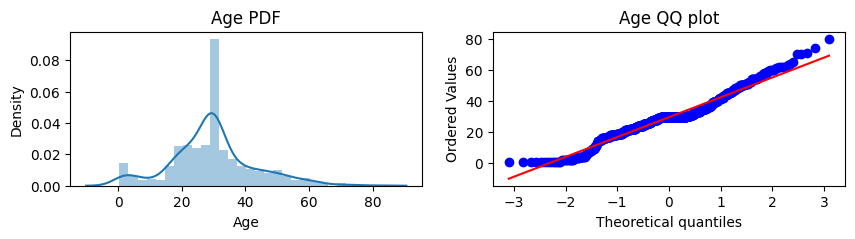

In [ ]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.distplot(x_train['Age'])
plt.title("Age PDF")

plt.subplot(1,2,2)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title("Age QQ plot")

plt.show()


<ipython-input-21-42c50d357322>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


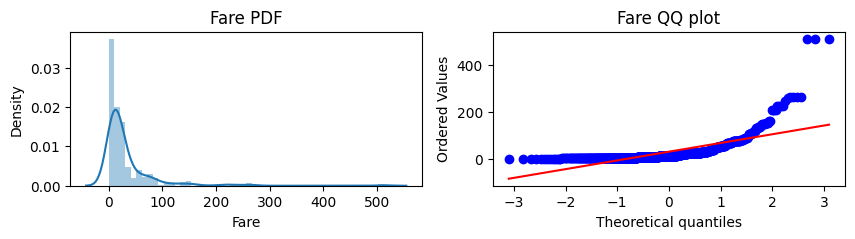

In [ ]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.distplot(x_train['Fare'])
plt.title("Fare PDF")

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("Fare QQ plot")

plt.show()


In [ ]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()


clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)

print("Logistic Regression Accuracy",accuracy_score(y_test,y_pred1))
print("Decision Tree Accuracy",accuracy_score(y_test,y_pred2))


Logistic Regression Accuracy 0.6480446927374302
Decision Tree Accuracy 0.6703910614525139


In [ ]:
trf=FunctionTransformer(func=np.log1p)#log1p adds 1 then find log,handles 0
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.fit_transform(x_test)


In [ ]:
clf1.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred1=clf1.predict(x_test_trf)
y_pred2=clf2.predict(x_test_trf)

print("Logistic Regression Accuracy",accuracy_score(y_test,y_pred1))
print("Decision Tree Accuracy",accuracy_score(y_test,y_pred2))

Logistic Regression Accuracy 0.6815642458100558
Decision Tree Accuracy 0.6703910614525139


In [ ]:
x_trf=trf.fit_transform(x)
x_trf
for i in range(2,11):
  print(i-1)
  print("LR",np.mean(cross_val_score(clf1,x_trf,y,scoring='accuracy',cv=i)))
  print("DT",np.mean(cross_val_score(clf2,x_trf,y,scoring='accuracy',cv=i)))

1
LR 0.6734267143648914
DT 0.6184083236761224
2
LR 0.6790123456790124
DT 0.6419753086419754
3
LR 0.6768018018018018
DT 0.6486839978992445
4
LR 0.6780114242671521
DT 0.6419873203188751
5
LR 0.6791145172017655
DT 0.6441970493983917
6
LR 0.6769192913385826
DT 0.6397725674915635
7
LR 0.6780385296010296
DT 0.6487089768339769
8
LR 0.6778900112233445
DT 0.6464646464646464
9
LR 0.678027465667915
DT 0.6610736579275904


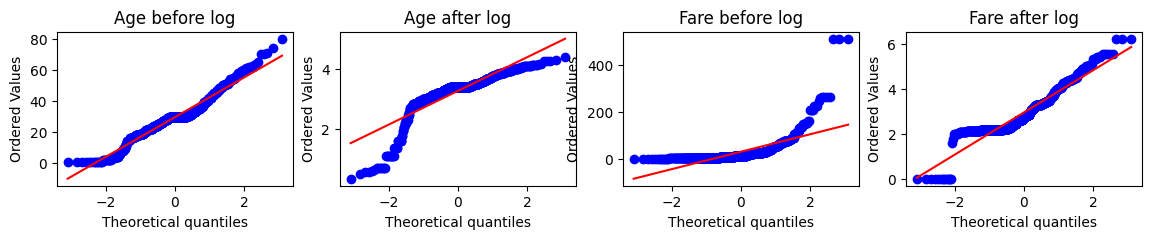

In [ ]:
plt.figure(figsize=(14,2))
plt.subplot(1,4,1)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title("Age before log")

plt.subplot(1,4,2)
stats.probplot(x_train_trf['Age'],dist="norm",plot=plt)
plt.title("Age after log")


plt.subplot(1,4,3)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("Fare before log")

plt.subplot(1,4,4)
stats.probplot(x_train_trf['Fare'],dist="norm",plot=plt)
plt.title("Fare after log")


plt.show()


In [ ]:
##### after log age is not performing well, so we keep it with only fare
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
x_train_trf2=trf2.fit_transform(x_train)
x_test_trf2=trf2.transform(x_test)

clf1.fit(x_train_trf2,y_train)
clf2.fit(x_train_trf2,y_train)

y_pred1=clf1.predict(x_test_trf2)
y_pred2=clf2.predict(x_test_trf2)

print("Logistic Regression Accuracy",accuracy_score(y_test,y_pred1))
print("Decision Tree Accuracy",accuracy_score(y_test,y_pred2))

Logistic Regression Accuracy 0.6703910614525139
Decision Tree Accuracy 0.664804469273743


In [ ]:
def apply_transform(transform):
  x=df.drop(columns=['Survived'])
  y=df['Survived']
  trf=ColumnTransformer([('log',FunctionTransformer(transform),['Age','Fare'])],remainder='passthrough')
  x_trf=trf.fit_transform(x)
  clf1=LogisticRegression()
  clf2=DecisionTreeClassifier()

  print("Accuarcy of LR",np.mean(cross_val_score(clf1,x_trf,y,scoring='accuracy',cv=10)))
  print("Accuarcy of DT",np.mean(cross_val_score(clf2,x_trf,y,scoring='accuracy',cv=10)))
  plt.figure(figsize=(14,2))
  plt.subplot(1,4,1)
  stats.probplot(x_train['Age'],dist="norm",plot=plt)
  plt.title("Age before transform")

  plt.subplot(1,4,2)
  stats.probplot(x_train_trf['Age'],dist="norm",plot=plt)
  plt.title("Age after transform")


  plt.subplot(1,4,3)
  stats.probplot(x_train['Fare'],dist="norm",plot=plt)
  plt.title("Fare before transform")

  plt.subplot(1,4,4)
  stats.probplot(x_train_trf['Fare'],dist="norm",plot=plt)
  plt.title("Fare after transform")


  plt.show()






Accuarcy of LR 0.678027465667915
Accuarcy of DT 0.6610736579275904


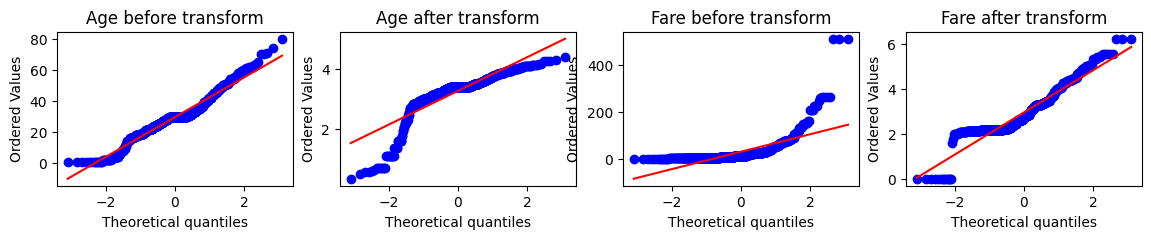

In [ ]:
apply_transform(np.log1p)

Accuarcy of LR 0.6768664169787766
Accuarcy of DT 0.6555181023720349


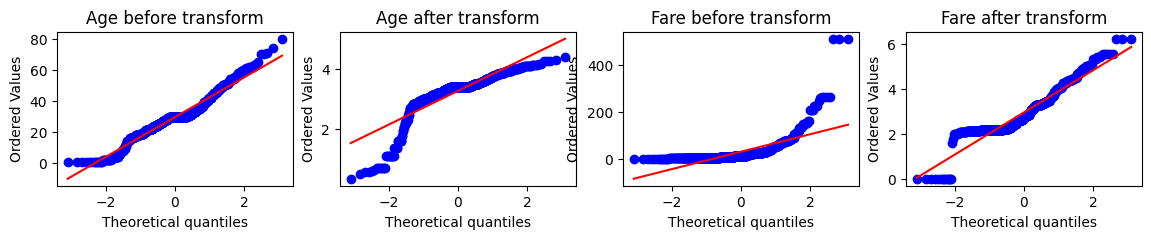

In [ ]:
apply_transform(np.sqrt)

Accuarcy of LR 0.6420099875156055
Accuarcy of DT 0.6554806491885143


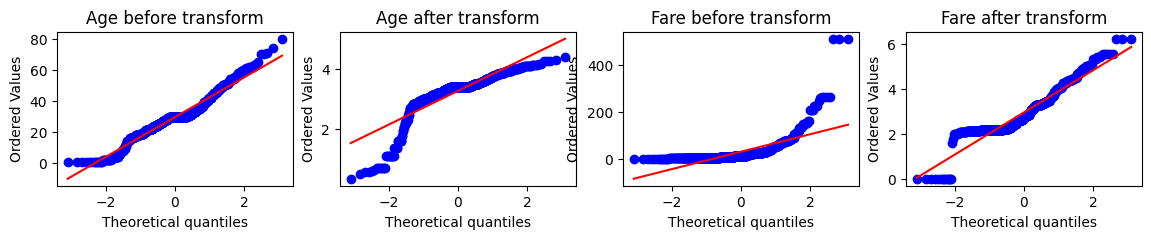

In [ ]:
apply_transform(np.square)

Accuarcy of LR 0.616167290886392
Accuarcy of DT 0.6678152309612984


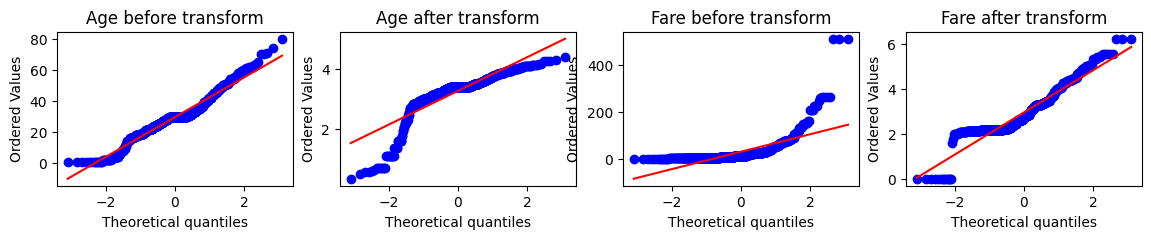

In [ ]:
apply_transform(lambda x:1/(x+0.000000001))

In [ ]:
############ power transformer
# x(i)^(n)=(x(i)^n-1)/n if n!=0 ln(x(i)) if n=0
# n is the power estimate n here varies [-5,5], choose the optimal one results in best approximation
#of normal distribution of your variable
#method1 ---maximum likelihood
#method2 ---bayesian statistics
df=pd.read_csv('/content/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
x=df.drop(columns=['Strength'])
y=df['Strength']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((824, 8), (206, 8))

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.627553179231485

<ipython-input-60-f2449fc5157e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


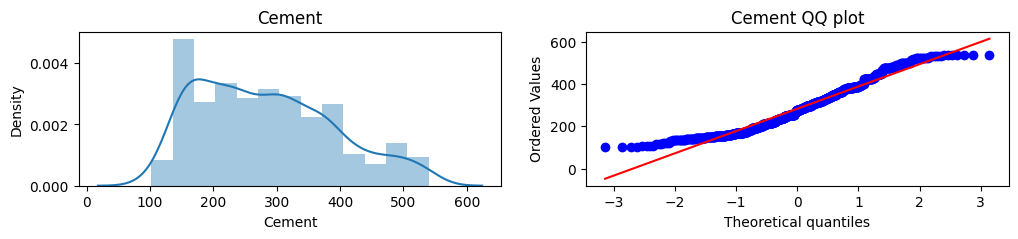

<ipython-input-60-f2449fc5157e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


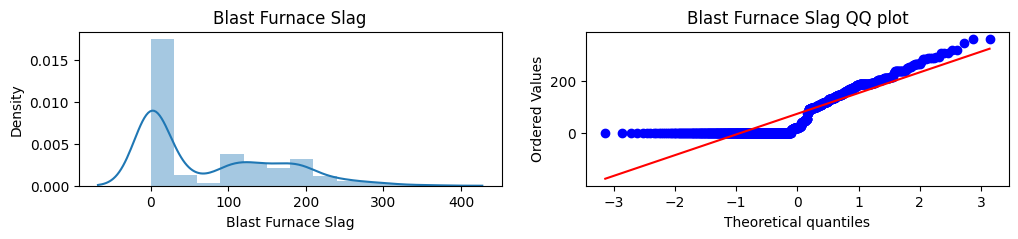

<ipython-input-60-f2449fc5157e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


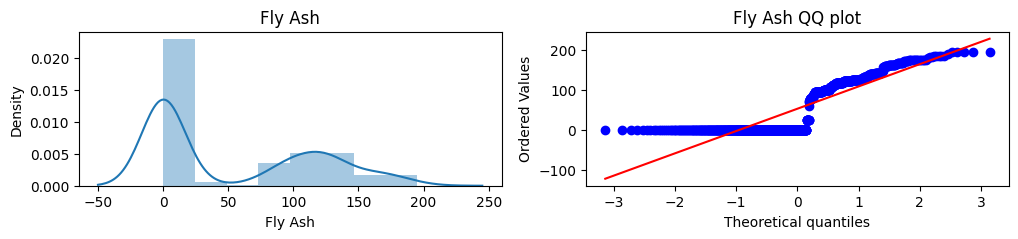

<ipython-input-60-f2449fc5157e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


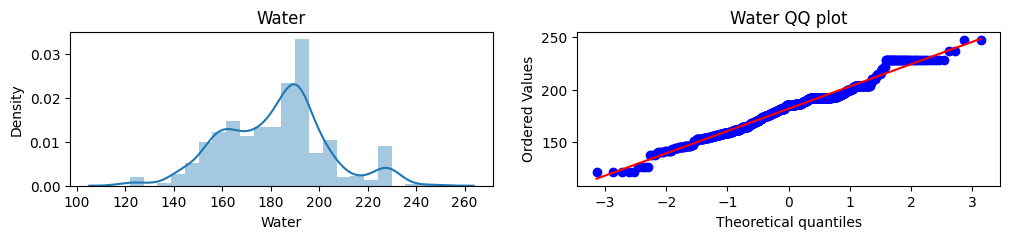

<ipython-input-60-f2449fc5157e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


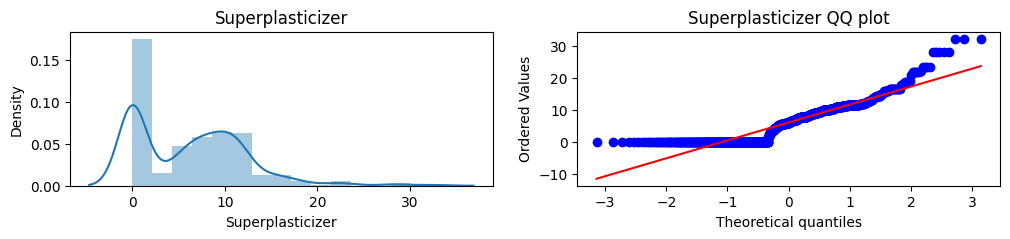

<ipython-input-60-f2449fc5157e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


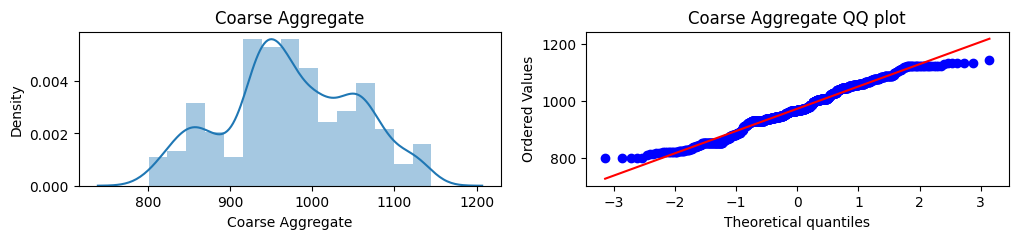

<ipython-input-60-f2449fc5157e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


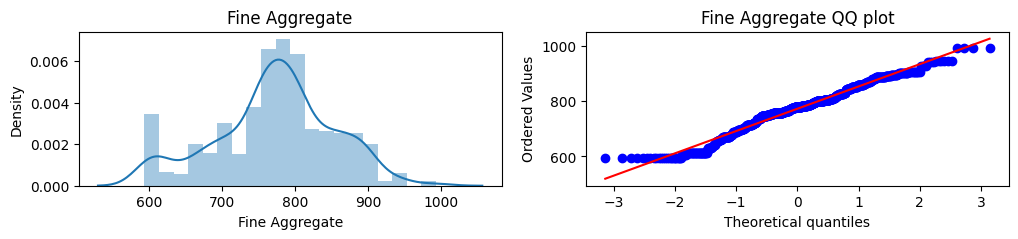

<ipython-input-60-f2449fc5157e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


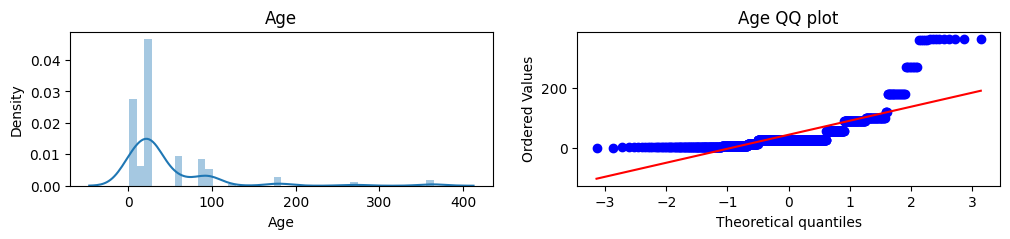

In [ ]:
for col in x_train.columns:
  plt.figure(figsize=(12,2))
  plt.subplot(1,2,1)
  sns.distplot(x_train[col])
  plt.title(col)

  plt.subplot(1,2,2)
  stats.probplot(x_train[col],dist="norm",plot=plt)
  plt.title(col+" QQ plot")

  plt.show()

In [ ]:
pt=PowerTransformer(method='box-cox')
x_train_trf=pt.fit_transform(x_train+0.000001)
x_test_trf=pt.transform(x_test+0.000001)


x_train_trf=pd.DataFrame(x_train_trf,columns=x_train.columns)
pd.DataFrame({'cols':x_train.columns,'box-cox_lambdas':pt.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [ ]:
lr.fit(x_train_trf,y_train)
y_pred=lr.predict(x_test_trf)
r2_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.8047825011695535

<ipython-input-70-a50d13bcd5c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-70-a50d13bcd5c9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


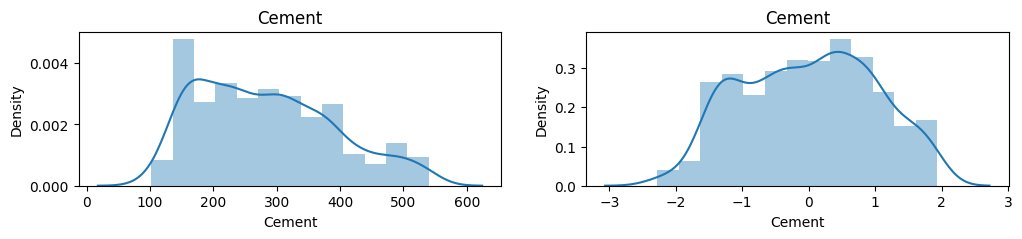

<ipython-input-70-a50d13bcd5c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-70-a50d13bcd5c9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


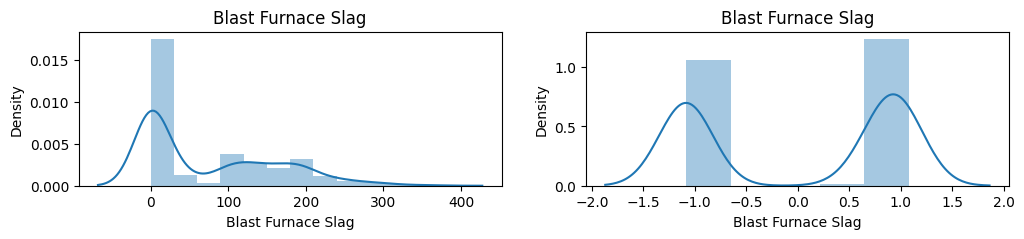

<ipython-input-70-a50d13bcd5c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-70-a50d13bcd5c9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


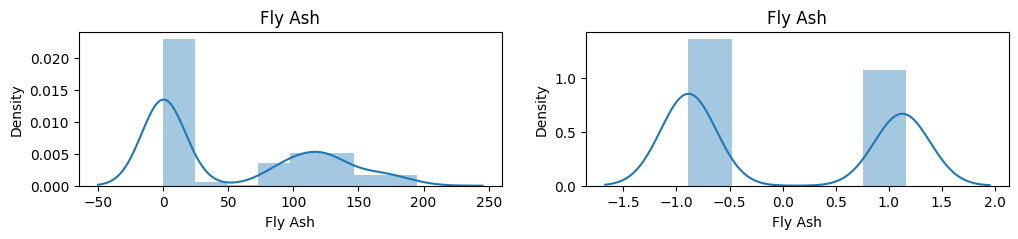

<ipython-input-70-a50d13bcd5c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-70-a50d13bcd5c9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


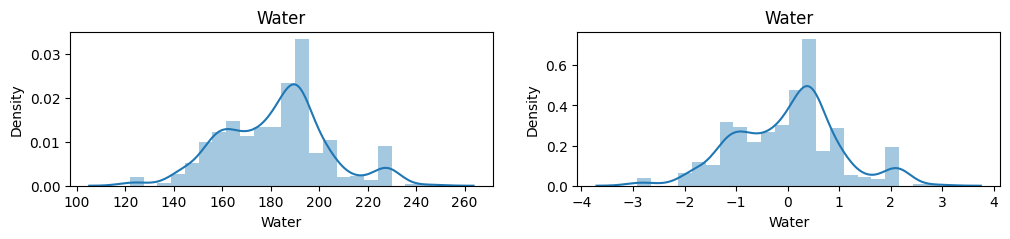

<ipython-input-70-a50d13bcd5c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-70-a50d13bcd5c9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


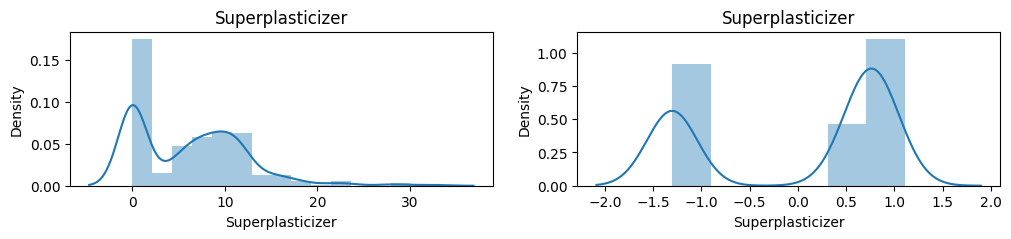

<ipython-input-70-a50d13bcd5c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-70-a50d13bcd5c9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


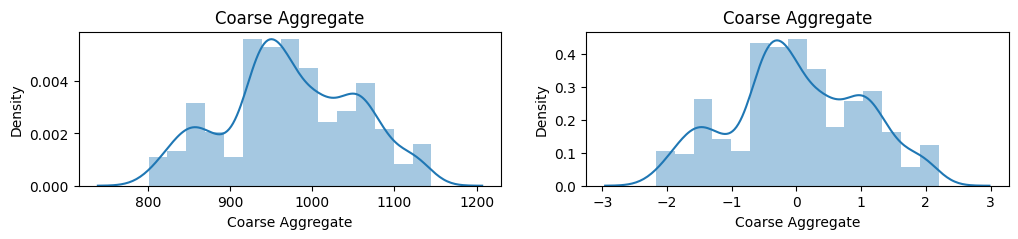

<ipython-input-70-a50d13bcd5c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-70-a50d13bcd5c9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


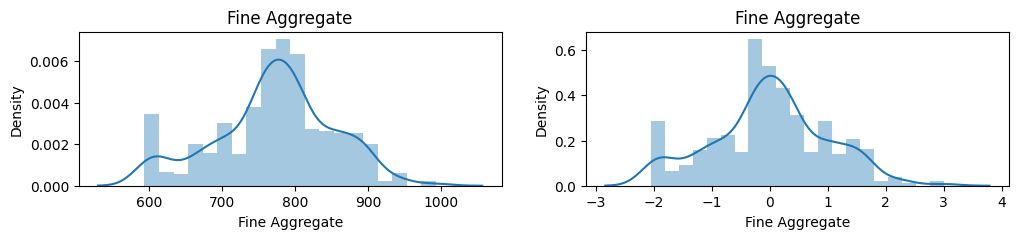

<ipython-input-70-a50d13bcd5c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
<ipython-input-70-a50d13bcd5c9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


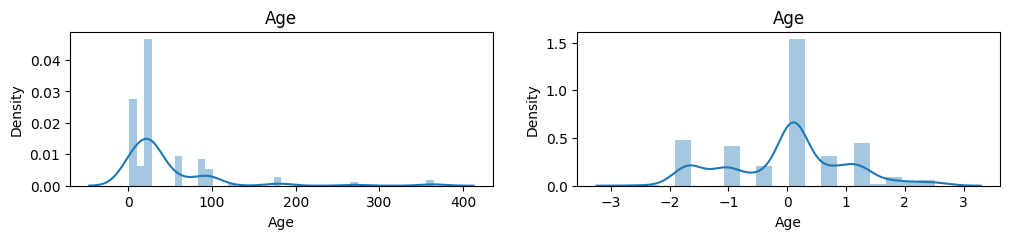

In [ ]:
##before and after comparison for box cox plot
for col in x_train.columns:
  plt.figure(figsize=(12,2))
  plt.subplot(1,2,1)
  sns.distplot(x_train[col])
  plt.title(col)

  plt.subplot(1,2,2)
  sns.distplot(x_train_trf[col])
  plt.title(col)

  plt.show()



In [ ]:
##apply yeo -johnson
pt=PowerTransformer(method='yeo-johnson')
x_train_trf=pt.fit_transform(x_train)
x_test_trf=pt.transform(x_test)

x_train_trf=pd.DataFrame(x_train_trf,columns=x_train.columns)
pd.DataFrame({'cols':x_train.columns,'yeo-johnson_lambdas':pt.lambdas_})

,cols,yeo-johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [ ]:
lr.fit(x_train_trf,y_train)
y_pred=lr.predict(x_test_trf)
r2_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.8161906512004999

In [ ]:
#############################################   Binning and Binarization ##########################################################

In [ ]:
# Encoding numerical features
# Method 1--- binning creates bin to change numerical features into categorical, also called discretization
# Method 2----binarisation used in image processing either 0 or 1
#############
# discretization is the process of transforming continuos variables into discrete variables by
#creating a set of contiguous intervals that span the range of variable's values
#it handles outliers and improve value spread
#types of discretization : unsupervised binning, supervised binning,custom binning
#unsupervised binning-- equal width(uniform) binning,equal frequency(quantile) binning, K means binning
#supervised ---decision tree binning

In [ ]:
#equal width binning or uniform binning :
#quantile binning :bins=10 each interval will contain 10% of total observation
#k means binning :clustering algorithm


df=pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(714, 3)

In [ ]:

x=df.iloc[:,1:]
y=df.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clf=DecisionTreeClassifier()
#without binning
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6363636363636364

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6373043818466353

In [ ]:
#with binning
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

trf.named_transformers_['first'].n_bins_,trf.named_transformers_['second'].n_bins_
trf.named_transformers_['first'].bin_edges_[0],trf.named_transformers_['second'].bin_edges_

(array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
        50.  , 80.  ]),
 array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
                26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
       dtype=object))

In [ ]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [ ]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
112,22.0,3.0,8.0500,2.0,"(19.0, 22.0]","(7.896, 9.225]"
804,27.0,4.0,6.9750,0.0,"(25.0, 28.5]","(0.0, 7.75]"
571,53.0,9.0,51.4792,8.0,"(50.0, 80.0]","(29.125, 51.479]"
205,2.0,0.0,10.4625,3.0,"(0.42, 14.0]","(9.225, 13.0]"
275,63.0,9.0,77.9583,8.0,"(50.0, 80.0]","(51.479, 82.171]"


In [ ]:
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [ ]:
def discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf=ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])
  x_train_trf=trf.fit_transform(x_train)
  x_test_trf=trf.transform(x_test)

  clf=DecisionTreeClassifier()
  clf.fit(x_train_trf,y_train)
  y_pred=clf.predict(x_test_trf)
  print(accuracy_score(y_test,y_pred))

  plt.figure(figsize=(14,2))
  plt.subplot(1,4,1)
  plt.hist(x_train['Age'])
  plt.title("Age Before binning")

  plt.subplot(1,4,2)
  plt.hist(x_train_trf[:,0],color='r')
  plt.title("Age after binning")

  plt.subplot(1,4,3)
  plt.hist(x_train['Fare'])
  plt.title("Fare Before binning")

  plt.subplot(1,4,4)
  plt.hist(x_train_trf[:,1],color='r')
  plt.title("Fare after binning")

  plt.show()

0.6223776223776224


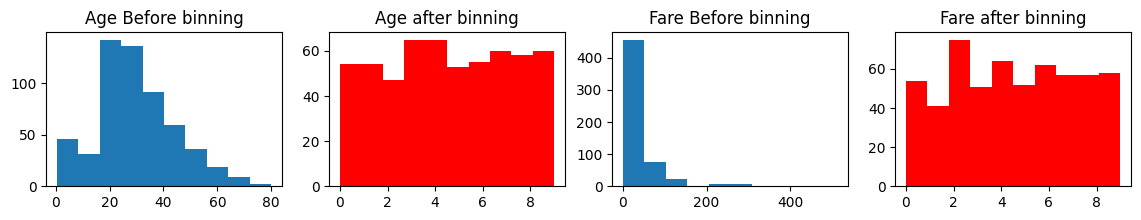

In [ ]:
discretize(10,'quantile')

0.6783216783216783


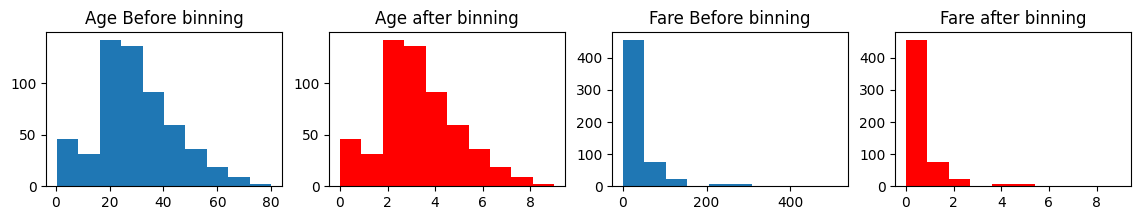

In [ ]:
discretize(10,'uniform')

0.6223776223776224


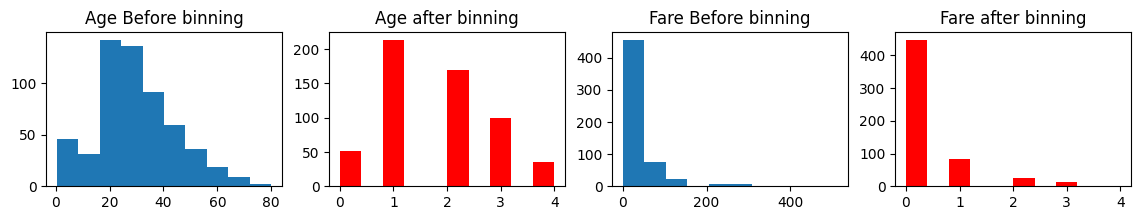

In [ ]:
discretize(5,'kmeans')

In [ ]:
### custom/domain based binning
#0-17--teenage
#18-40--adult
#41-60---middle aged
#61> --- old

In [ ]:
## binarization: special case of discretisation,used in image processing
#converts numerical value to binary
#income <6 L---No tex
#>6--tex

In [ ]:
df = pd.read_csv('titanic.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0
...,...,...,...,...,...
885,39.0,29.1250,0,5,0
886,27.0,13.0000,0,0,0
887,19.0,30.0000,0,0,1
889,26.0,30.0000,0,0,1


In [ ]:
df['family'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
x = df.drop(columns=['Survived'])
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [ ]:
#without binarization


clf = DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.6153846153846154

In [ ]:
#with binarization


from sklearn.preprocessing import Binarizer
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

pd.DataFrame(x_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

accuracy_score(y_test,y_pred2)

0.5944055944055944

In [ ]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy'))

0.6261737089201878